In [1]:
#%matplotlib widget
#%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
%config InlineBackend.print_figure_kwargs = {'facecolor': (1.0, 1.0, 1.0, 0.0)}
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
# correct image orientation and improve appearance:
matplotlib.rcParams.update({
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'font.family': 'serif',
})

# not great practice for real code, but we can safely ignore
# warnings in this example:
import warnings
warnings.simplefilter('ignore')

Filename: member.uid___A001_X2df7_X602.B335_sci.spw25_27_29_31.cont.I.pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     365   (192, 192, 1, 1)   float32   


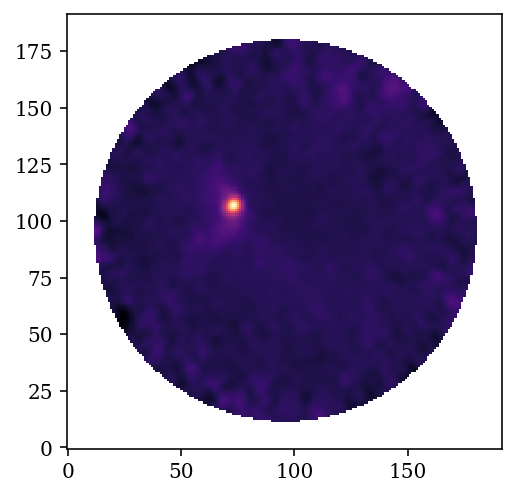

In [2]:
from astropy.io import fits
# Cambia esta ruta por el archivo FITS
dataset = "member.uid___A001_X2df7_X602.B335_sci.spw25_27_29_31.cont.I.pbcor.fits"

# Abrir el FITS
hdul = fits.open(dataset)
header = hdul[0].header
data = hdul[0].data.squeeze()  # quita ejes vacíos
plt.imshow(data)
hdul.info()

In [3]:
from astropy.wcs import WCS
wcs=WCS(header)
print(f"Dimensiones del WCS: {wcs.naxis}")
print(f"Forma de los datos: {data.shape}")
#Esto me dio bastante problemas para graficar ya que WCS me daba en 4 dimensiones osea estaba tomando (RA, DEC, FREQ, STOKES), 
#Para resolver esto lo que huce fue recortar lo que no me interesaba y dejarlo en una variable llamada wcs_2d

Dimensiones del WCS: 4
Forma de los datos: (192, 192)


In [4]:
# Construir WCS pero recortando a 2D (solo RA, DEC)
wcs_2d = WCS(header, naxis=2)

print(f"Dimensiones del WCS original: {wcs.naxis}")
print(f"Dimensiones del WCS reducido: {wcs_2d.naxis}")
print(f"Forma de los datos: {data.shape}")


Dimensiones del WCS original: 4
Dimensiones del WCS reducido: 2
Forma de los datos: (192, 192)


In [5]:
wcs_2d

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 294.2529166993  7.568888784111  
CRPIX : 97.0  97.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -3.611111108576e-05  3.611111108576e-05  
NAXIS : 192  192  1  1

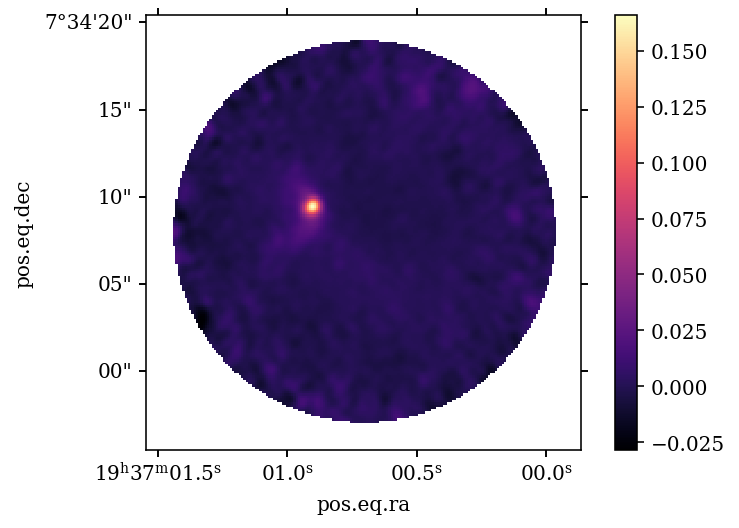

In [6]:
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
plt.colorbar(im)

In [82]:
data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [7]:
from astropy.io import fits
cont_level=np.linspace(np.min(data),np.max(data),20)


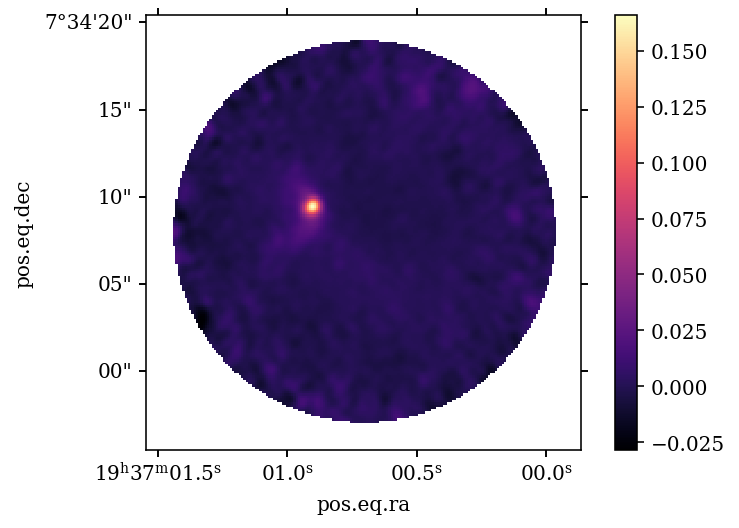

In [8]:
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
#plt.contour(data,levels=cont_level,colors='red')
plt.colorbar(im)

In [9]:
dec_ll, ra_ll = 7.568333,294.2545833
dec_ur, ra_ur = 7.569861, 294.2525
(xmin1, xmax1), (ymin1, ymax1) = wcs_2d.all_world2pix([ra_ll, ra_ur], [dec_ll, dec_ur], 0)
(xmin1, xmax1), (ymin1, ymax1)

((50.25003454926414, 107.43879936173781),
 (80.60914301962622, 122.92290703811771))

In [33]:
c_ll = SkyCoord("19h37m01.12s +07d34m6.7s", frame="icrs")  # esquina inferior izq
c_ur = SkyCoord("19h37m00.75s +07d34m12s", frame="icrs")  # esquina sup der
xpix, ypix = wcs_2d.all_world2pix([c_ll.ra.deg, c_ur.ra.deg],
                                  [c_ll.dec.deg, c_ur.dec.deg], 0)

xmin1 = int(np.floor(np.min(xpix)))
xmax1 = int(np.ceil (np.max(xpix)))
ymin1 = int(np.floor(np.min(ypix)))
ymax1 = int(np.ceil (np.max(ypix)))


[(47.0, 91.0), (86.0, 127.0)]

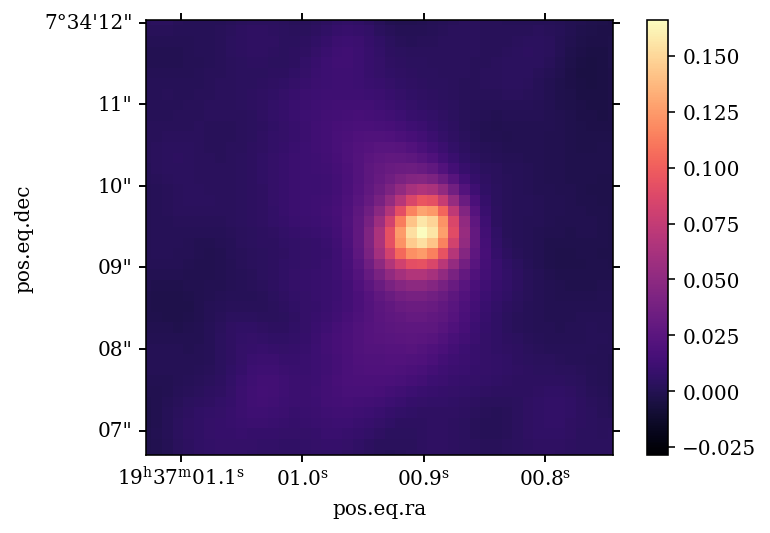

In [34]:
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
plt.contour(data,levels=cont_level,colors='red')
plt.colorbar(im)
ax.set(xlim=(xmin1, xmax1), ylim=(ymin1, ymax1))

# Metodo cajas

[(113.0, 123.0), (80.0, 97.0)]

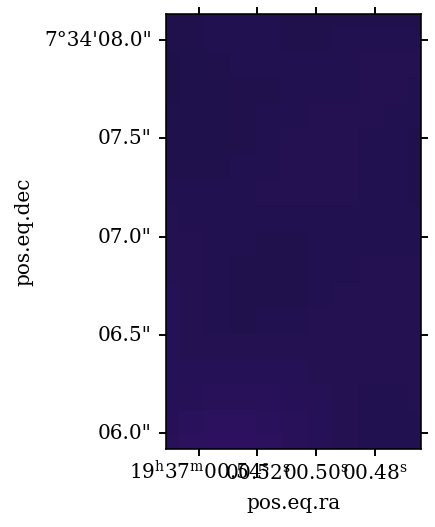

In [30]:

# RA en formato HH MM SS hay que pasarlo a grados: (H + M/60 + S/3600) * 15
ra_ll  = (19 + 37/60 + 0.47/3600) * 15   # esquina inferior izq (RA)
dec_ll = 7 + 34/60 + 6/3600              # esquina inferior izq (Dec)

ra_ur  = (19 + 37/60 + 0.55/3600) * 15   # esquina sup der (RA)
dec_ur = 7 + 34/60 + 8/3600              # esquina sup der (Dec)

# Aqui lo que hago es un array que  para las esquinas para x y y. Cada array va a tener 2 elementos.
#Uso wcs_2d.all_world2pix por que ocupo obtener la infomacion en pixels no en ascencion recta osea no en grados. Y lo que hace
#ese comando es justo eso pasar de grados a pixels.
xpix, ypix = wcs_2d.all_world2pix([ra_ll, ra_ur], [dec_ll, dec_ur], 0)

# Lo que hice es que para los minimos usando la funcion suelo se lo aplique al array y me dio el minimo valor para x y y.
#Para los maximos use la funcion max y despues techo para obtener el valor mayor del array, y ademas el entero mayor.
#Porque la funcion nanstd solo funciona con valores enteros.
xmin = int(np.floor(np.min(xpix)))
xmax = int(np.ceil (np.max(xpix)))
ymin = int(np.floor(np.min(ypix)))
ymax = int(np.ceil (np.max(ypix)))

#Grafique los limites para ver si tenia sentido hacerlo en esa seccion.
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

RMS en la caja: 1.311e-03 Jy/beam


[(47.0, 91.0), (86.0, 127.0)]

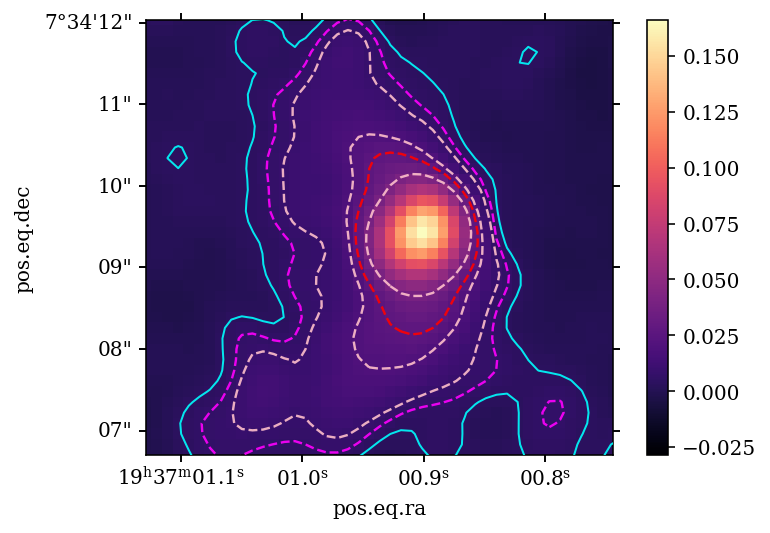

In [40]:
# El rms en esa seccion de la imagen.
data1 = data[ymin:ymax, xmin:xmax]   # filas=y, columnas=x
rms_caja = np.nanstd(data1)


print(f"RMS en la caja: {rms_caja:.3e} {header.get('BUNIT','')}")
#Grafica
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.contour(data, levels=[3 * rms_caja], colors='cyan', linewidths=1.0, alpha=0.9, linestyles='solid')
ax.contour(data, levels=[5 * rms_caja], colors='magenta', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[7 * rms_caja], colors='pink', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[20 * rms_caja], colors='red', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[15 * rms_caja], colors='pink', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[30 * rms_caja], colors='pink', linewidths=1.2, alpha=0.9, linestyles='dashed')
plt.colorbar(im)
ax.set(xlim=(xmin1, xmax1), ylim=(ymin1, ymax1))
#plt.savefig("diagrama_contorno1.png")

### Quise probar otra forma para evitar tener que hacer conversiones manuales, use SkyCoord para hacer las conversiones automaticas a grados.

Simplemente probe si me daba los mismos valores el rms

[(113.0, 123.0), (80.0, 97.0)]

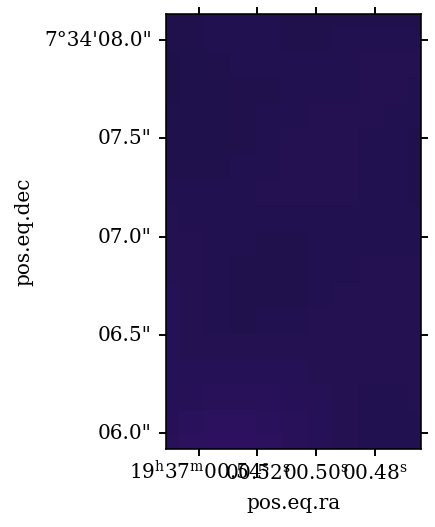

In [13]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Usando SkyCoord 
c_ll = SkyCoord("19h37m00.47s +07d34m06s", frame="icrs")  # esquina inferior izq
c_ur = SkyCoord("19h37m00.55s +07d34m08s", frame="icrs")  # esquina sup der

# Aqui lo que hago es un array que  para las esquinas para x y y. Cada array va a tener 2 elementos.
#Uso wcs_2d.all_world2pix por que ocupo obtener la infomacion en pixels no en ascencion recta osea no en grados
xpix, ypix = wcs_2d.all_world2pix([c_ll.ra.deg, c_ur.ra.deg],
                                  [c_ll.dec.deg, c_ur.dec.deg], 0)

xmin = int(np.floor(np.min(xpix)))
xmax = int(np.ceil (np.max(xpix)))
ymin = int(np.floor(np.min(ypix)))
ymax = int(np.ceil (np.max(ypix)))
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

In [155]:
# RMS en la caja con la conversion automatizada
data1 = data[ymin:ymax, xmin:xmax]
rms_converauto = np.nanstd(data1)

print(f"caja: x=[{xmin}:{xmax}], y=[{ymin}:{ymax}], shape={cutout.shape}")
print(f"RMS en la caja: {rms_converauto:.3e} {header.get('BUNIT','')}")

caja: x=[113:123], y=[80:97], shape=(17, 10)
RMS en la caja: 1.311e-03 Jy/beam


Es el mismo 

[(50.25003454926414, 107.43879936173781),
 (80.60914301962622, 122.92290703811771)]

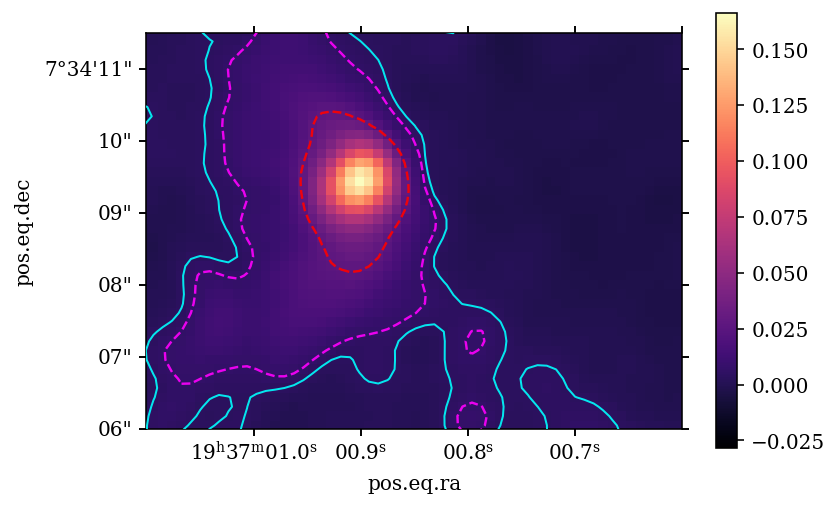

In [163]:
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.contour(data, levels=[3 * rms_caja], colors='cyan', linewidths=1.0, alpha=0.9, linestyles='solid')
ax.contour(data, levels=[5 * rms_caja], colors='magenta', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[20 * rms_caja], colors='red', linewidths=1.2, alpha=0.9, linestyles='dashed')
plt.colorbar(im)
ax.set(xlim=(xmin1, xmax1), ylim=(ymin1, ymax1))

# Probe otra region que no tuviera mucha intensidad.

[(99.0, 108.0), (80.0, 89.0)]

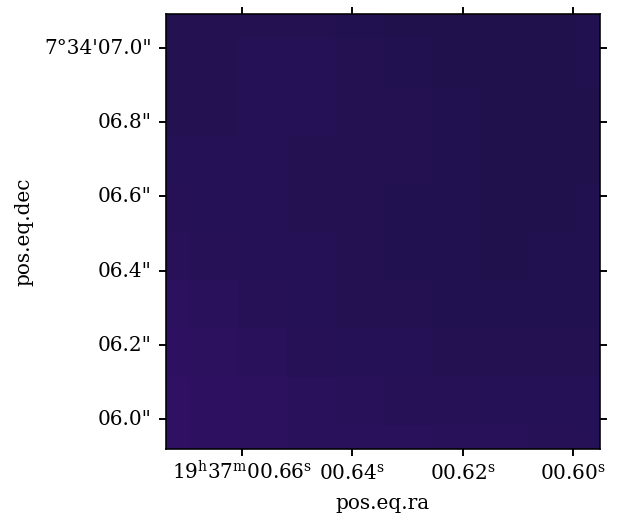

In [158]:
from astropy.coordinates import SkyCoord
import astropy.units as u

#Usando SkyCoord
c_ll = SkyCoord("19h37m00.6s +07d34m06s", frame="icrs")  # esquina inferior izq
c_ur = SkyCoord("19h37m00.67s +07d34m07s", frame="icrs")  # esquina sup der

# Aqui lo que hago es un array que  para las esquinas para x y y. Cada array va a tener 2 elementos.
xpix, ypix = wcs_2d.all_world2pix([c_ll.ra.deg, c_ur.ra.deg],[c_ll.dec.deg, c_ur.dec.deg], 0)

# Lo que hice es que para los minimos usando la funcion suelo se lo aplique al array y me dio el minimo valor para x y y.
#Para los maximos use la funcion max y despues techo para obtener el valor mayor del array, y ademas el entero mayor.
#Porque la funcion nanstd solo funciona con valores enteros.
xmin = int(np.floor(np.min(xpix)))
xmax = int(np.ceil (np.max(xpix)))
ymin = int(np.floor(np.min(ypix)))
ymax = int(np.ceil (np.max(ypix)))

ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

Caja 2: x=[99:108], y=[80:89], shape=(17, 10)
RMS en la caja 2: 1.756e-03 Jy/beam


[(50.25003454926414, 107.43879936173781),
 (80.60914301962622, 122.92290703811771)]

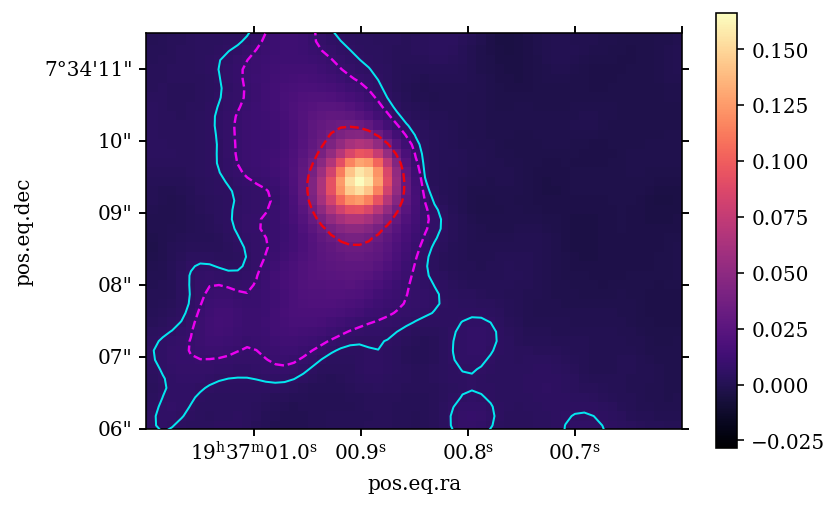

In [161]:
# Aqui simplemente asigno en array los x,y maximo y minimo para usarlo en la funcion std.
data_2 = data[ymin:ymax, xmin:xmax]
rms_caja2 = np.nanstd(data_2)

print(f"Caja 2: x=[{xmin}:{xmax}], y=[{ymin}:{ymax}], shape={cutout.shape}")
print(f"RMS en la caja 2: {rms_caja2:.3e} {header.get('BUNIT','')}")
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.contour(data, levels=[3 * rms_caja2], colors='cyan', linewidths=1.0, alpha=0.9, linestyles='solid')
ax.contour(data, levels=[5 * rms_caja2], colors='magenta', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[20 * rms_caja2], colors='red', linewidths=1.2, alpha=0.9, linestyles='dashed')
plt.colorbar(im)
ax.set(xlim=(xmin1, xmax1), ylim=(ymin1, ymax1))

Me dio valores distintos entonces hay algo interesante ahi, lo raro es que hay 1 orden de magnitude de diferencia entre 1 y otro. Puedo probar con el promedio de ambos para ver si cambia algo.
$$RMS_{prom}=\frac{rms_{caja1}+rms_{caja2}}{2}$$

[(50.25003454926414, 107.43879936173781),
 (80.60914301962622, 122.92290703811771)]

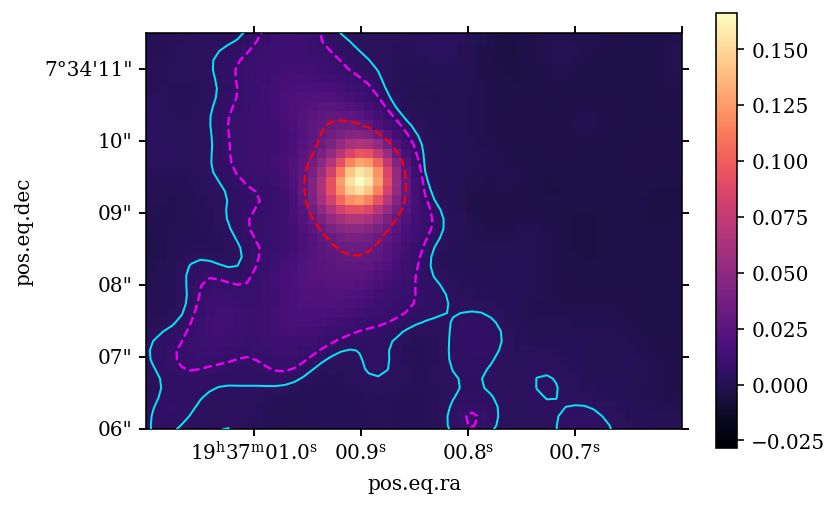

In [162]:
RMS_prom=(rms_caja+rms_caja2)/2
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.contour(data, levels=[3 * RMS_prom], colors='cyan', linewidths=1.0, alpha=0.9, linestyles='solid')
ax.contour(data, levels=[5 * RMS_prom], colors='magenta', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[20 *RMS_prom], colors='red', linewidths=1.2, alpha=0.9, linestyles='dashed')
plt.colorbar(im)
ax.set(xlim=(xmin1, xmax1), ylim=(ymin1, ymax1))

No funciono, en realidad la caja 2 tiene mejor background. Eso lo se por que lo obtuve usando una visalizacion de las partes con mayor emision de la imagen. Abajo muestro esa imagen.

# Metodo Basado en astropy


In [37]:
from astropy.stats import sigma_clipped_stats

In [38]:
#Solo use lo que esta en la documentacion en astropy. En si esta funcion no toma en cuenta los pixeles mas brillante y en esa zonas
#menos brillantes saca la media y el std osea del background. Hace 5 iteraciones.
mean_clip, med_clip, std_clip = sigma_clipped_stats(data, sigma=3.0, maxiters=5, cenfunc='median', stdfunc='std')
print("Valores de media,mediana y sted -> mean, median, std:", mean_clip, med_clip, std_clip)

#Cree una máscara de 'fondo' (píxeles débiles) osea que elimine los lugares con mucha intensidad.
k = 1.0  # umbral en sigmas (ej: 1.0 ó 1.5)
# Elimino los nan y inf que pueden llegar a ser un problema, ademas solo usa parte de la data donde los pixeles nos on muy brillantes
mask_background = (np.isfinite(data)) & (data < (med_clip + k * std_clip))

#Buen filtro

#RMS estimado en el fondo
rms_v3 = np.nanstd(data[mask_background])
print(f"Método A - RMS estimado (sigma-clipped): {rms_v3:.5e} {header.get('BUNIT','')}")


Valores de media,mediana y sted -> mean, median, std: 0.00022831776 8.568529e-05 0.0032079087
Método A - RMS estimado (sigma-clipped): 2.86351e-03 Jy/beam


[(47.0, 91.0), (86.0, 127.0)]

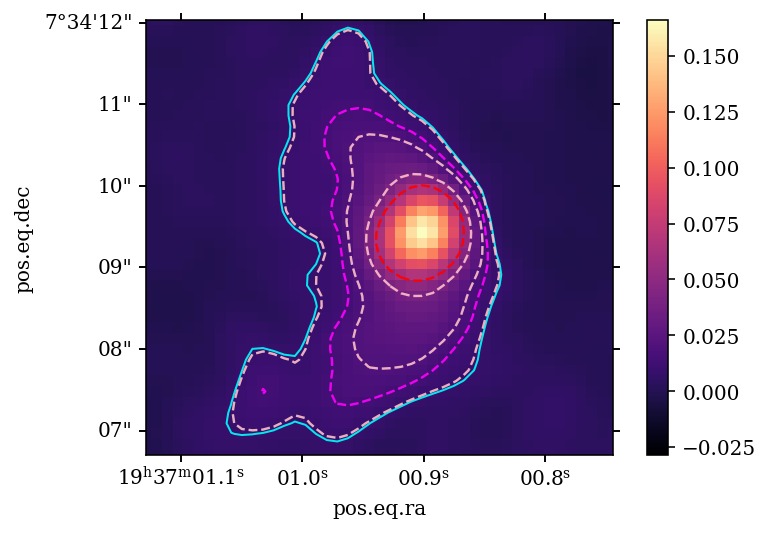

In [41]:
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
ax.contour(data, levels=[3 * rms_v3], colors='cyan', linewidths=1.0, alpha=0.9, linestyles='solid')
ax.contour(data, levels=[5 * rms_v3], colors='magenta', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[20 * rms_v3], colors='red', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[7 * rms_caja], colors='pink', linewidths=1.2, alpha=0.9, linestyles='dashed')
#ax.contour(data, levels=[20 * rms_caja], colors='red', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[15 * rms_caja], colors='pink', linewidths=1.2, alpha=0.9, linestyles='dashed')
ax.contour(data, levels=[30 * rms_caja], colors='pink', linewidths=1.2, alpha=0.9, linestyles='dashed')
plt.colorbar(im)
ax.set(xlim=(xmin1, xmax1), ylim=(ymin1, ymax1))

## Aqui parece que los contornos son mas acorde a la emision. Parece que esta version me dio mejores resultados o por lo menos mas parecidos a los de CARTA.

## Como obtuve las zonas de las cajas para obtener el rms para el segundo ejemplo
Para el segundo ejemplo del metodo caja para obtener el rms, use este mapa de contraste para ver en donde habia menos intensidad, y por eso se mira mejor.

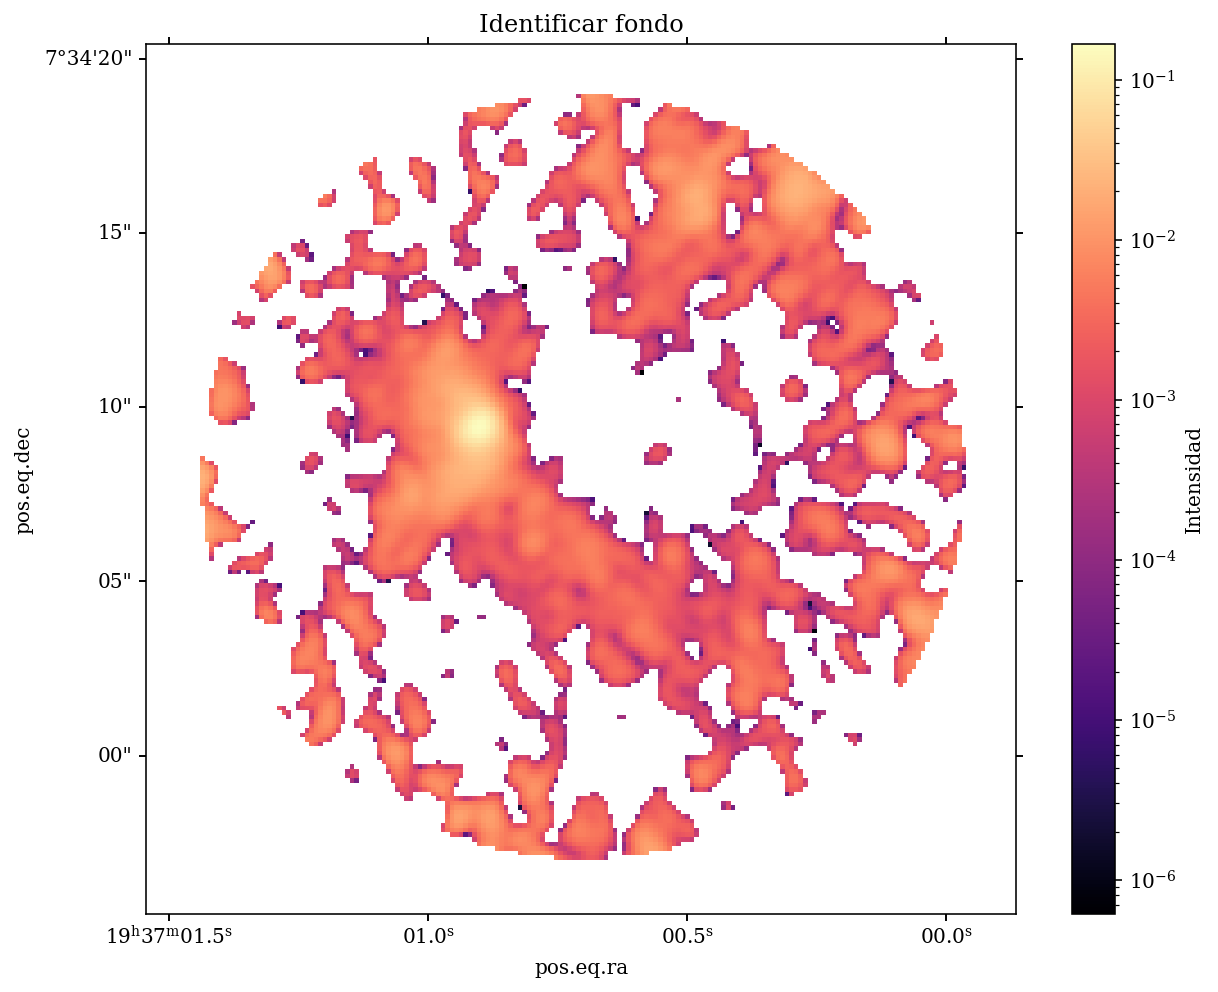

In [167]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data, norm=LogNorm()) # Esro me ayuda a ver las zonas con mas intensidad. Tambien con menos intensodad.
plt.colorbar(im, label='Intensidad')
ax.set_title('Identificar fondo')
plt.show()


[(50.25003454926414, 107.43879936173781),
 (80.60914301962622, 122.92290703811771)]

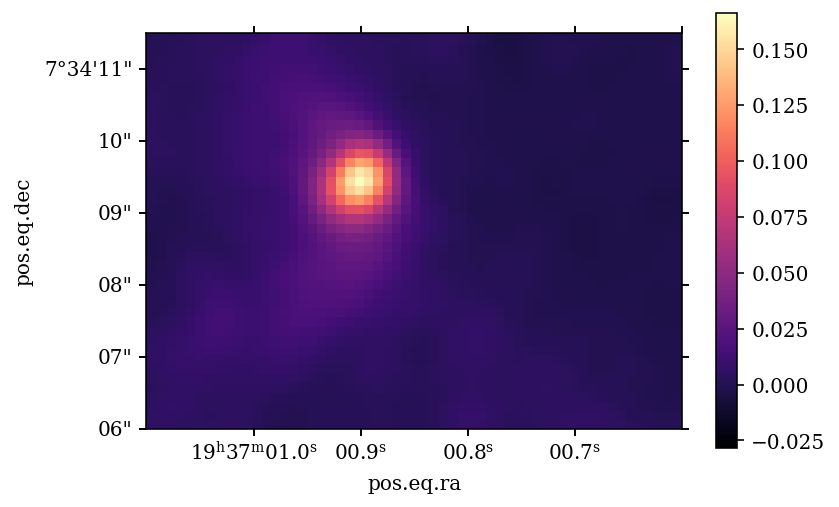

In [30]:
ax = plt.subplot(projection=wcs_2d)
im = ax.imshow(data)
plt.contour(data,levels=cont_level,colors='red')
plt.colorbar(im)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

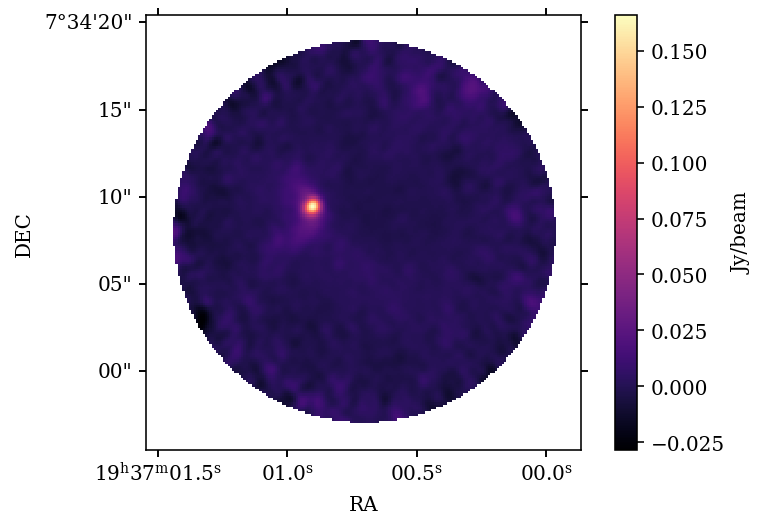